<a href="https://colab.research.google.com/github/maximsachs/AlienVault_office365_Phishing_analysis/blob/master/AlienVault_OTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Using the OXTv2 Python SDK from https://github.com/AlienVault-OTX/OTX-Python-SDK

Allowing access to https://otx.alienvault.com/browse



In [ ]:
#!pip install otxv2

In [ ]:
from OTXv2 import OTXv2, IndicatorTypes
from pandas import json_normalize
from datetime import datetime, timedelta

In [ ]:
otx = OTXv2("b7457eef31a9587bd701bf8ebd9f80d90088b698d9c89727aaae50451afa1133")

## Subscriptions

The getall() method accesses your subscriptions.  It downloads all the OTX pulses and their assocciated indicators of compromise (IOCs) from your account. This includes:  
- All pulses you subscribe to directly
- All pulses by users you subscribe to
- OTX pulses you created (including private pulses)
If this is the first time you are using your account, the download includes all pulses created by AlienVault. All users are subscribed to the AlienVault user by default.

In [ ]:
pulses = otx.getall()

KeyboardInterrupt: ignored

In [ ]:
len(pulses)

2863

Let's list a few pulses:

In [ ]:
json_normalize(pulses)[0:25]

,industries,tlp,description,created,tags,malware_families,modified,author_name,public,extract_source,references,targeted_countries,indicators,attack_ids,more_indicators,revision,adversary,id,name
0,"[technology, government, healthcare, financial...",white,"""The Iranian-based malicious cyber actor assoc...",2020-09-16T19:09:16.287000,"[keetheft.dll, Iran, APT, webshell, ChunkyTuna...",[],2020-09-16T19:09:16.287000,AlienVault,1,[],[https://us-cert.cisa.gov/ncas/analysis-report...,[United States of America],[{'indicator': 'c8bc262d7126c3399baaec3bee89d5...,[],False,1,,5f6262dc77641faf707202f5,Iranian Web Shell Analysis - Malware Analysis ...
1,"[gaming, telecommunicton, government, healthca...",white,"""The US Department of Justice (DOJ) indicted f...",2020-09-16T15:38:50.144000,"[winnti, China, CN_APT, APT41]",[],2020-09-16T18:28:32.007000,AlienVault,1,[],"[FBI Flash Report AC-000133-TT, https://www.ju...","[United States of America, Hong Kong, United K...","[{'indicator': 'pic.4pu.com', 'description': '...",[],False,6,APT41,5f62318a419e133716eca72d,APT41 Intrusion Activities
2,[],white,Malicious actors continue to target environmen...,2020-09-16T14:54:01.756000,"[docker, container, cryptominer, cryptomining,...",[],2020-09-16T14:54:01.756000,AlienVault,1,[],[https://www.trendmicro.com/en_us/research/20/...,[],"[{'indicator': 'CVE-2017-5638', 'description':...",[],False,1,,5f622709681c2f7c568f13f4,Exposed Docker Server Abused to Drop Cryptomin...
3,"[Manufacturing, insurance, legal, Finance]",white,Lucifer is a Windows crypto miner and DDOS hyb...,2020-09-16T14:48:31.491000,"[linux, windows, ddos, blacksquid, lucifer, mi...","[lucifer, Rudeminer, Blacksquid]",2020-09-16T14:48:31.491000,AlienVault,1,[],[https://research.checkpoint.com/2020/rudemine...,[],"[{'indicator': 'CVE-2017-0144', 'description':...",[],False,1,,5f6225bf864da5b2c1061152,"Rudeminer, Blacksquid and Lucifer Campaigns"
4,[Finance],white,GoldenSpy actors are continuing to push new Go...,2020-08-17T20:41:09.628000,"[GoldenSpy Uninstaller, GoldenSpy]","[GoldenSpy, GoldenSpy Uninstaller]",2020-09-16T00:04:11.801000,AlienVault,1,[],[https://www.trustwave.com/en-us/resources/blo...,[China],"[{'indicator': 'www.ningzhidata.com', 'descrip...","[T1012, T1057, T1082, T1083, T1497]",False,2,,5f3aeb65fc7a7cb0b37b9b28,Multiple GoldenSpy Uninstaller Variants Discov...
5,[],white,Over the weekend Cado Security discovered a cr...,2020-08-17T15:27:28.022000,"[Team TNT, AWS Credentials, Cryptomining Worm,...","[XMRig, Backdoor.Linux.Tsunami, Diamorphine Ro...",2020-09-16T00:04:11.801000,AlienVault,1,[],[https://www.cadosecurity.com/2020/08/17/teamt...,[],"[{'indicator': 'teamtnt.red', 'description': '...","[T1078.004, T1526, T1555]",False,1,Team TNT,5f3aa1e047a40112d69f524d,Team TNT - The First Crypto-Mining Worm to Ste...
6,[],white,"Since last June 2020, a new wave of the URSA t...",2020-09-15T18:49:26.284000,"[URSA Trojan, URSA Loader, Mispadu, AutoIT Loa...","[MSIL/Ursa.Loader, Trojan:Win32/Mispadu, AutoI...",2020-09-15T18:49:26.284000,AlienVault,1,[],[https://seguranca-informatica.pt/threat-analy...,"[Mexico, Costa Rica, Bolivia, Plurinational St...",[{'indicator': '7705b87603e0d772e1753441001fcf...,"[T1010, T1012, T1027, T1033, T1047, T1055, T10...",False,1,,5f610cb62458e403adeca72d,Threat analysis: The emergent URSA trojan impa...
7,[],white,"""This new malware that we have discovered and ...",2020-09-10T16:14:45.914000,"[voip, cdrthief, mysql, linknat, linux, vos300...",[],2020-09-15T15:42:22.127000,AlienVault,1,[],[https://www.welivesecurity.com/2020/09/10/who...,[],[{'indicator': '3339b8c4a522548b67fca732c54fa2...,"[T1027, T1041, T1071, T1082, T1552, T1560]",False,1,CDRThief,5f5a50f6f40067efa7602116,CDRThief targets Linux VoIP softswitches
8,[],white,"Over the weekend, almost two thousand Magento ...",2020-09-14T16:30:03.162000,"[magento, magecart, skimmer]",[Trojan:JS/Magecart],2020-09-14T16:30:03.162000,AlienVault,1,[],[https://sansec.io/research/largest-magento-ha..

- author_name: The username of the OTX User that created the pulse
- created: Date when the pulse was created in the system
- description: Describes the pulse in terms of the type of threat it poses, and any other facts that may link it to other threat indicators.
- id: Unique identifier of the pulse
- indicators: Collection of Indicators Of Compromise 
- modified: Date when the pulse was last modified
- name: Name of the pulse
- references: List of references to papers, websites or blogs related to the threat described in the pulse
- revision: Revision number that increments each time pulse contents change
- tags: List of tags that provide information about pulse content, for example, Phshing, malware, C&C, and apt.

Let's explore the indicators object:

In [ ]:
json_normalize(pulses[1]["indicators"])

,_id,created,description,indicator,type
0,55b05f0ab45ff5326594e69a,2015-07-23T03:27:06.425,,fc50bcf33e7c50681947d7d1d1eac47617399c09d8c6d2...,FileHash-SHA256
1,55b05f0ab45ff5326594e69b,2015-07-23T03:27:06.425,,3f6e4df766b6736dd8a37d7a523e2476421c531e36301b...,FileHash-SHA256
2,55b05f0ab45ff5326594e69c,2015-07-23T03:27:06.425,,cb46167d5ece696f9b7d5f7861ffcbb4244ea21e660c47...,FileHash-SHA256
3,55b05f0ab45ff5326594e69d,2015-07-23T03:27:06.425,,c6c123c729d59c7a0a25926a23ac198ad5ed006a9c4559...,FileHash-SHA256
4,55b05f0ab45ff5326594e69e,2015-07-23T03:27:06.425,,bca528538a2d67768ec63627dba12a43db1c2ecb86b3d4...,FileHash-SHA256
5,55b05f0ab45ff5326594e69f,2015-07-23T03:27:06.425,,59e6c285b930ab0c2f83bae0807a4aeff6a1c2c17a556b...,FileHash-SHA256
6,55b05f0ab45ff5326594e6a0,2015-07-23T03:27:06.425,,2a76a717108c43eadaafbfed4d26f3374fa116bf048654...,FileHash-SHA256
7,55b05f0ab45ff5326594e6a1,2015-07-23T03:27:06.425,,25a477a2487be6e6583ea47b042ebc2660cb29dbe98b53...,FileHash-SHA256
8,55b05f0ab45ff5326594e6a2,2015-07-23T03:27:06.425,,6ee18a546f9e91417a788fdaf9cf0e4b14970282adf2b9...,FileHash-SHA256
9,55b05f0ab45ff5326594e6a3,2015-07-23T03:27:06.425,,447fc68b78593a8a4d877887fe28bc729f6f082d453d66...,FileHash-SHA256


- _id: Unique identifier of the IOC
- created: Date IOC was added to the pulse
- description: Describe the Indicator Of Compromise
- indicator: The IOC
- indicator_type: Type of indicator

The following Indicator Types are supported (also defined in IndicatorTypes.py):

In [ ]:
indicator_types = [
			{
			    "name": "IPv4", 
			    "description": "An IPv4 address indicating the online location of a server or other computer."
			}, 
			{
			    "name": "IPv6", 
			    "description": "An IPv6 address indicating the online location of a server or other computer."
			}, 
			{
			    "name": "domain", 
			    "description": "A domain name for a website or server. Domains encompass a series of hostnames."
			}, 
			{
			    "name": "hostname", 
			    "description": "The hostname for a server located within a domain."
			}, 
			{
			     
			    "name": "email", 
			    "description": "An email associated with suspicious activity."
			}, 
			{
			    "name": "URL", 
			    "description": " Uniform Resource Location (URL) summarizing the online location of a file or resource."
			}, 
			{
			     
			    "name": "URI", 
			    "description": "Uniform Resource Indicator (URI) describing the explicit path to a file hosted online."
			}, 
			{
			    "name": "FileHash-MD5", 
			    "description": "A MD5-format hash that summarizes the architecture and content of a file."
			}, 
			{
			    "name": "FileHash-SHA1", 
			    "description": "A SHA-format hash that summarizes the architecture and content of a file."
			}, 
			{
			    "name": "FileHash-SHA256", 
			    "description": "A SHA-256-format hash that summarizes the architecture and content of a file."
			}, 
			{
			     
			    "name": "FileHash-PEHASH", 
			    "description": "A PEPHASH-format hash that summarizes the architecture and content of a file."
			}, 
			{
			     
			    "name": "FileHash-IMPHASH", 
			    "description": "An IMPHASH-format hash that summarizes the architecture and content of a file."
			}, 
			{
			    "name": "CIDR", 
			    "description": "Classless Inter-Domain Routing (CIDR) address, which describes both a server's IP address and the network architecture (routing path) surrounding that server."
			}, 
			{
			     
			    "name": "FilePath", 
			    "description": "A unique location in a file system."
			}, 
			{
			     
			    "name": "Mutex", 
			    "description": "The name of a mutex resource describing the execution architecture of a file."
			}, 
			{
			    "name": "CVE", 
			    "description": "Common Vulnerability and Exposure (CVE) entry describing a software vulnerability that can be exploited to engage in malicious activity."
			}]

In [ ]:
json_normalize(indicator_types)

,description,name
0,An IPv4 address indicating the online location...,IPv4
1,An IPv6 address indicating the online location...,IPv6
2,A domain name for a website or server. Domains...,domain
3,The hostname for a server located within a dom...,hostname
4,An email associated with suspicious activity.,email
5,Uniform Resource Location (URL) summarizing t...,URL
6,Uniform Resource Indicator (URI) describing th...,URI
7,A MD5-format hash that summarizes the architec...,FileHash-MD5
8,A SHA-format hash that summarizes the architec...,FileHash-SHA1
9,A SHA-256-format hash that summarizes the arch...,FileHash-SHA256


In [ ]:
mtime = (datetime.now() - timedelta(days=1)).isoformat()

In [ ]:
mtime

'2015-07-23T18:29:49.657037'

## Events

Besides receiving the pulse information, there is another function that can retrieve different events that are ocurring in the OTX system and affect your account.

In [ ]:
events = otx.getevents_since(mtime)

In [ ]:
json_normalize(events)

,action,created,id,object_id,object_type
0,subscribe,2015-07-24T20:46:59.508000,55b2a443b45ff532057ccc08,55b290e5b45ff508d47ccc10,pulse
1,subscribe,2015-07-24T20:55:20.630000,55b2a638b45ff5366d7ccc08,55b04cbeb45ff52d6c94e6bd,pulse
2,subscribe,2015-07-24T20:55:21.552000,55b2a639b45ff536837ccc08,55b05f0ab45ff5326594e6cc,pulse
3,subscribe,2015-07-24T20:55:22.537000,55b2a63ab45ff5367d7ccc08,55b11b85b45ff51d9a7ccc0d,pulse
4,unsubscribe,2015-07-24T20:55:24.746000,55b2a63cb45ff536727ccc08,55b05f0ab45ff5326594e6cc,pulse
5,unsubscribe,2015-07-24T21:09:46.722000,55b2a99ab45ff53da77ccc08,55b04cbeb45ff52d6c94e6bd,pulse
6,unsubscribe,2015-07-24T21:09:47.608000,55b2a99bb45ff53dc47ccc08,55b11b85b45ff51d9a7ccc0d,pulse
7,unsubscribe,2015-07-24T21:09:47.993000,55b2a99bb45ff53da67ccc08,55b290e5b45ff508d47ccc10,pulse
8,subscribe,2015-07-24T21:09:49.474000,55b2a99db45ff53dec7ccc08,55b05f0ab45ff5326594e6cc,pulse
9,unsubscribe,2015-07-24T21:09:53.078000,55b2a9a1b45ff53dec7ccc09,55b05f0ab45ff5326594e6cc,pulse


- id: object id of this event.  Unique reference identifier
- action : "[subscribe | unsubscribe | delete]", Currently supports subscribe / unsubscribe events for users and pulses and delete events for pulses
- object_type : "[pulse | user]", // Currently supports events for pulse and user objects
- object_id : "[pulse id | author id]", // Unique id can be used to lookup pulses and users (e.g. to remove them from  system, they would remove all pulses by author_id or an individual pulse by pulse "id".
"created" : <timestamp of event>

When developing an application, you must decide how you want to handle different types of events. For instance, if one OTX user unsubscribes from another user, do you want to delete the IOCs the second user contributed from your application? How do you plan to reconcile the data on the server versus the data in your application?
The same question comes up when users delete a pulse.

## Using Search and get Pulse by ID

The OTX API allows you to search for pulses and users by keyword.  This allows you to obtain pulses that you're not (yet) subscribed to.

In [ ]:
pulses = otx.search_pulses("Russian")

In [ ]:
json_normalize(pulses["results"])

,TLP,author.avatar_url,author.id,author.username,cloned_from,comment_count,created,description,downvotes_count,export_count,...,modified_text,name,public,references,subscriber_count,tags,upvotes_count,validator_count,vote,votes_count
0,green,https://otx20-web-media.s3.amazonaws.com/media...,55003d1d13432a7f96c2be0a,AlienVault,None,0,2016-05-18T14:52:41.117000,"Operation Groundbait (Russian: Прикормка, Prik...",0,14,...,2 days ago,Operation Groundbait: Analysis of a surveillan...,True,[http://www.welivesecurity.com/wp-content/uplo...,14655,"[Groundbait, russia, ukraine, Prikormka, surve...",2,0,1,2
1,green,https://otx20-web-media.s3.amazonaws.com/media...,55bb3ec74637f238607a9c69,bartblaze,None,0,2016-05-10T10:48:53.586000,A new ransomware called Enigma was discovered ...,0,3,...,9 days ago,Enigma ransomware,True,[http://www.bleepingcomputer.com/news/security...,138,"[enigma, enigma ransomware]",0,0,0,0
2,green,https://otx20-web-media.s3.amazonaws.com/media...,55003d1d13432a7f96c2be0a,AlienVault,None,0,2016-05-10T16:03:54.294000,Recently the Mobile Malware Research Team of I...,0,19,...,9 days ago,Android Malware Clicker.G!Gen Found on Google ...,True,[https://blogs.mcafee.com/mcafee-labs/android-...,14653,"[google play, trojan, android, mobile, malware...",3,0,1,3
3,green,https://otx20-web-media.s3.amazonaws.com/media...,5721dc5ca08845015a81565c,Umbra00,None,0,2016-05-03T11:11:14.151000,Attempting to append the pot. analysis of the ...,0,1,...,17 days ago,Remote Code Execution Attempt / auto append file,True,[],21,"[R.TXT, ghc.ru, rst.void.ru, 1dt.w0lf]",0,0,0,0
4,green,https://otx20-web-media.s3.amazonaws.com/media...,55bb3ec74637f238607a9c69,bartblaze,None,0,2016-04-29T16:32:35.621000,"BrLock was found on April 18, 2016, but the ex...",0,3,...,20 days ago,BrLock ransomware,True,[https://www.proofpoint.com/us/threat-insight/...,138,"[brlock, brlock ransomware]",1,0,0,1


Let's say we're interested in viewing the full details (including indicators) from one of our search results.  For example maybe we're interested in the Enigma Ransomware:

In [ ]:
pulse_id = pulses["results"][1]["id"]

In [ ]:
pulse_details = otx.get_pulse_details(pulse_id)

In [ ]:
json_normalize(pulse_details)

,TLP,author_name,created,description,id,indicators,modified,name,public,references,revision,tags
0,green,bartblaze,2016-05-10T10:48:53.586000,A new ransomware called Enigma was discovered ...,5731bc95452c27015dad07e0,[{u'indicator': u'e8c8417f335cd2766ad1570de8b1...,2016-05-11T12:17:46.494000,Enigma ransomware,True,[http://www.bleepingcomputer.com/news/security...,2.0,"[enigma, enigma ransomware]"


## Validity dictionary

In [1]:
!pip install otxv2
from OTXv2 import OTXv2, IndicatorTypes
from pandas import json_normalize
from datetime import datetime, timedelta
import pandas as pd
import pickle


In [ ]:
otx = OTXv2('183da24eb7b9e41059ba596891f6364d63fb16dd7b2375922270e5b570ce9109')
use_cached_results = True
if use_cached_results:
  # Loading the dataframe from the pickle file rather than doing the long api call again.
  pulses = pickle.load(open("office_365_search_results.pickle", "rb"))
else:
  # Getting the search result, and saving the dataframe as a pickle file
  # The search api has by default a limit of 25 results. This can be increased with max_results parameter.
  # How many should we analyse?
  pulses = otx.search_pulses("office 365", max_results=1000)
  pulses = json_normalize(pulses["results"])
  pickle.dump(pulses, open("office_365_search_results.pickle", "wb"))
pulses[:10]

,industries,TLP,description,created,in_group,tags,malware_families,modified,author_name,public,is_subscribing,references,targeted_countries,groups,indicators,attack_ids,revision,adversary,id,name,author.username,author.is_subscribed,author.avatar_url,author.is_following,author.id
0,[],green,This report is a comprehensive description of ...,2015-11-03T17:43:22.497000,False,"[JSocket, android, AlienSpy, rat, java, remote...",[],2015-11-03T17:43:22.497000,AlienVault,1,None,[https://www.fidelissecurity.com/sites/default...,[],[],"[{'indicator': 'd370.cc', 'description': '', '...",[],1,None,5638f23a4637f2388aaed240,Ratcheting Down on JSocket: A PC and Android T...,AlienVault,True,https://otx20-web-media.s3.amazonaws.com/media...,False,2
1,[],green,"The Attack is comprised of the typical ""You mu...",2016-01-21T16:06:17.352000,False,[],[],2016-01-21T16:12:27.591000,packetogre,1,None,[],[],[],[{'indicator': '18b5179135fc8d2c9924e10daa92ac...,[],2,None,56a101f94637f24bb848c92a,Account Update,packetogre,False,https://otx20-web-media.s3.amazonaws.com/media...,False,6712
2,[],green,From http://botnetlegalnotice.com/citadel/,2016-02-23T15:18:12.591000,False,[Citadel],[],2016-02-23T16:09:07.981000,cyberprotect,1,None,[http://botnetlegalnotice.com/citadel/files/Or...,[],[],"[{'indicator': 'almshotixpo.com', 'description...",[],3,None,56cc78354637f27567166f6e,Citadel Banker Trojan malicious domains [2013],cyberprotect,False,https://otx20-web-media.s3.amazonaws.com/media...,False,1192
3,[],green,"Starting June 22, an attack was detected among...",2016-06-28T20:48:50.806000,False,"[cerber, ransomware, zeroday]",[],2016-06-28T20:48:50.806000,zer0daydan,1,None,[http://www.avanan.com/resources/attack-on-off...,[],[],[{'indicator': '3a82b11ef68b94802385d0bf099312...,[],1,None,5772e2b2609200013550ce41,Widespread Attack on Office 365 Corporate User...,zer0daydan,False,https://otx20-web-media.s3.amazonaws.com/media...,False,10931
4,[],green,The weapon of choice in cybercrime today is sp...,2016-09-26T13:53:24.750000,False,[],[],2018-02-02T14:07:17.974000,zer0daydan,1,None,[https://www.virustotal.com/en/ip-address/188....,[],[],[{'indicator': '2fbd2ea3405655b30fc3eb0c3476ee...,[],5,,57e928543f5d465dafc74a78,Crimeware-as-a-Service,zer0daydan,False,https://otx20-web-media.s3.amazonaws.com/media...,False,10931
5,[],green,Proofpoint researchers recently observed a nov...,2016-10-31T15:45:59.278000,False,"[phishing, owa, outlook, excel, powershell, ve...",[],2016-10-31T15:45:59.278000,AlienVault,1,None,[https://www.proofpoint.com/us/threat-insight/...,[],[],[{'indicator': 'ef9f15bcb18f34a47406ebdbb470a7...,[],1,,581767371e315b1c815ac10f,Veil-Framework Infects Victims of Targeted OWA...,AlienVault,True,https://otx20-web-media.s3.amazonaws.com/media...,False,2
6,[],green,Talos has observed a small email campaign leve...,2017-02-06T21:08:51.204000,False,"[pony, malware, microsoft publisher, downloade...",[],2017-02-06T21:08:51.204000,AlienVault,1,None,[http://blog.talosintel.com/2017/02/pony-pub-f...,[],[],[{'indicator': '42d0990daba69fa5068a6910d0eac4...,[],1,,5898e5e3aa6f6e0ca0c6a47b,When A Pony Walks Out Of A Pub,AlienVault,True,https://otx20-web-media.s3.amazonaws.com/media...,False,2
7,[],green,I Represent as a technical Adviser at Gmail su...,2017-02-16T20:31:41.185000,False,[],[],2017-02-16T20:31:41.185000,Jonse25,1,None,[],[],[],[],[],1,tech support,58a60c2d5e057c1134b4a6c6,microsoftoutlookoffice365,Jonse25,False,https://otx.alienvault.com/assets/images/defau...,False,26720
8,[],green,Subject = Wire confirmation for invoice #78367...,2017-04-06T20:24:12.707000,False,[Phishing],[],2017-04-06T20:24:57.143000,Sajr2014,1,None,[http://urlquery.net/report.php?id=14915090864...,[],[],[{'indicator': 'http://www.proworxme.com/wp-in...,[],3,,58e6a3ec27b1134f2d0b5d9d,Phishing - Fake Office365 login page,Sajr2014,False,https://otx20-web-media.s3.amazonaws.com/media...,False,24135
9,[],white,This is an automated process that is updated h...,2017-05-17T12:54:06.715

In [ ]:
def pulses_to_indicators(pulses):
  indicators = []
  for index, pulse in pulses.iterrows():
    pulse_indicators = otx.get_pulse_indicators(pulse['id'])
    for indicator in pulse_indicators:
      indicators.append(indicator)
  indicators_df = pd.DataFrame(indicators)
  return indicators_df

indicators_df = pulses_to_indicators(pulses)


In [ ]:
# Counting the frequency of tags occurring.
from collections import defaultdict
tag_frequencies = defaultdict(lambda: 0)
tlp_frequencies = defaultdict(lambda: 0)
for index, pulse_entry in pulses.iterrows():
    if "tags" in pulse_entry:
      for tag in pulse_entry["tags"]:
          tag_frequencies[tag] += 1

tags_df = json_normalize(tag_frequencies).transpose()
tags_df.sort_values(0, axis=0, inplace=True, ascending=False)
print(tags_df.head(15).transpose().to_string())

   phishing  office365  Office 365  Phishing  office 365  Office365  office  o365  powershell  microsoft  business email compromise  outlook  fireeye  email  public
0        52         28          17        16          13         12      12     8           7          7                          7        7        6      5       4


### Count number of occurences for every word

In [ ]:
from collections import defaultdict

# count for all words the number of cases that contains the word
dictionary_frequencies = ['office','login', '365', 'office365', 'auth', 'microsoft']
dictionary_frequencies = dict.fromkeys(dictionary_frequencies,0)

for index,indicator in indicators_df.iterrows():
      for dict_word in dictionary_frequencies:
        if dict_word in indicator["indicator"]:
          dictionary_frequencies[dict_word] += 1

In [ ]:
print('number of indicators: ', len(indicators_df))
print(json_normalize(dictionary_frequencies))

number of indicators:  15760
   office  login  365  office365  auth  microsoft
0     433    263  245        142   130        211


### Give a occurence count for every indicator

In [ ]:
from collections import defaultdict
df1 = indicators_df
df1["occurences"] = 0
# count for all words the number of cases that contains the word
dictionary_frequencies = ['office','login', '365', 'office365', 'auth', 'microsoft']

for index,indicator in df1.iterrows():
  for dict_word in dictionary_frequencies:
        if dict_word in indicator["indicator"]:
          df1.iloc[index, df1.columns.get_loc('occurences')] += 1


In [ ]:
indicators_df

,indicator,description,created,title,is_active,slug,content,pulse_key,expiration,type,id,occurences
0,d370.cc,,2015-11-03T17:43:22,,1,domain,,5638f23a4637f2388aaed240,None,domain,98169,0
1,saleshore201.serveblog.net,,2015-11-03T17:43:22,,1,hostname,,5638f23a4637f2388aaed240,None,hostname,98170,0
2,floffman11.no-ip.org,,2015-11-03T17:43:22,,1,hostname,,5638f23a4637f2388aaed240,None,hostname,98171,0
3,akwotie.ddns.net,,2015-11-03T17:43:22,,1,hostname,,5638f23a4637f2388aaed240,None,hostname,98172,0
4,hydrabad-ur.ddns.net,,2015-11-03T17:43:22,,1,hostname,,5638f23a4637f2388aaed240,None,hostname,98173,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15755,83.110.102.47,,2020-09-11T19:24:30,,1,ip,,5f5bceed06c1a13218608aa5,2020-10-11T19:00:00,IPv4,2613529490,0
15756,122.163.77.183,,2020-09-11T19:24:30,,1,ip,,5f5bceed06c1a13218608aa5,2020-10-11T19:00:00,IPv4,2613529491,0
15757,14.189.36.26,,2020-09-11T19:24:30,,1,ip,,5f5bceed06c1a13218608aa5,2020-10-11T19:00:00,IPv4,2613529492,0
15758,112.197.222.253,,2020-09-11T19:24:30,,1,ip,,5f5bceed06c1a13218608aa5,2020-10-11T19:00:00,IPv4,2613529493,0


with zero


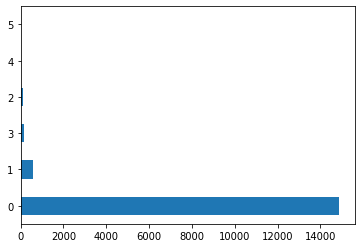

without zero


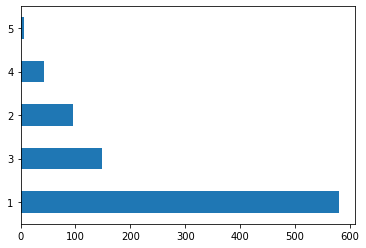

In [ ]:
import matplotlib.pyplot as plt

print("with zero")
df1["occurences"].value_counts().plot.barh()
plt.show()

print("without zero")
df2 = df1["occurences"]
df2[df2 != 0].value_counts().plot.barh()
plt.show()


### Group IP by targeted country

In [ ]:
group_by_country = defaultdict(int)
for pulse_index, pulse in pulses.iterrows():
  for indicator in pulse["indicators"]:
    if indicator["type"] == "IPv4":
      targeted_countries = pulse["targeted_countries"]
      IP = indicator["indicator"]
      if targeted_countries != []:
        for targeted_country in targeted_countries:
            group_by_country[targeted_country] = IP
        


In [ ]:
group_by_country

defaultdict(int,
            {'Australia': '45.88.3.58',
             'New Zealand': '50.246.167.41',
             'Spain': '200.201.129.98',
             'United Kingdom': '84.38.134.43',
             'United States': '105.112.68.170'})